In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
df=pd.read_csv('C:/Users/Hp/Desktop/Micro Credit Project/Data file.csv')
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

## EDA

In [3]:
#removing extra first column
df=df.iloc[:,1:]
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 36 columns]

In [4]:
#checking shape of the dataset
df.shape

(209593, 36)

There are 209593 rows and 37 columns in the dataset

In [5]:
#checking data types
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

msisdn, pcircle,pdate are object data type and remaining columns are of int or float type

In [6]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64


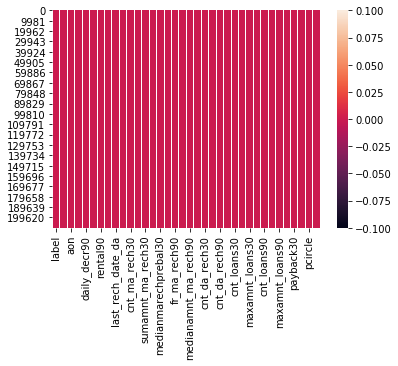

In [7]:
#checking missing values
print(df.isnull().sum())
#visualization
sns.heatmap(df.isnull())

Great!There are no missing values in the dataset


In [8]:
# printing the object data type columns and their unique values
for column in df.columns:
    if df[column].dtypes==object:
        print(str(column)+ ':' +str(df[column].unique()))
        print(df[column].value_counts())
        print('**********************************************************************')
        print('\n')

msisdn:['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
04581I85330    7
47819I90840    7
30080I90588    6
22038I88658    6
71742I90843    6
              ..
16027I85330    1
63675I89237    1
61124I70788    1
29848I88648    1
53788I70373    1
Name: msisdn, Length: 186243, dtype: int64
**********************************************************************


pcircle:['UPW']
UPW    209593
Name: pcircle, dtype: int64
**********************************************************************


pdate:['2016-07-20' '2016-08-10' '2016-08-19' '2016-06-06' '2016-06-22'
 '2016-07-02' '2016-07-05' '2016-08-05' '2016-06-15' '2016-06-08'
 '2016-06-12' '2016-06-20' '2016-06-29' '2016-06-16' '2016-08-03'
 '2016-06-24' '2016-07-04' '2016-07-03' '2016-07-01' '2016-08-08'
 '2016-06-26' '2016-06-23' '2016-07-06' '2016-07-09' '2016-06-10'
 '2016-06-07' '2016-06-27' '2016-08-11' '2016-06-30' '2016-06-19'
 '2016-07-26' '2016-08-14' '2016-06-14' '2016-06-21' '2016-06-25'


There are no categories in pcircle..it will not give any relation with target so lets drop it.


In [9]:
#dropping unnecessary column
df.drop(columns=['pcircle'],inplace=True)

## Summary Statistics

In [10]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

Observations:
    1)there is a large difference in 75% and max value in maxamnt_loans30 so there are outliers present in the dataset
    2)Most of the data is rightly skewed as mean is greater than median

In [11]:
#Now looking into date column ..here we have to separate day and month
df['pday']=pd.to_datetime(df.pdate,format='%Y-%m-%d').dt.day
df['pmonth']=pd.to_datetime(df.pdate,format='%Y-%m-%d').dt.month


In [12]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90       pdate  pday  pmonth  
0                 0.0  29.000000  29.000000  2016-07-20    20       7  
1                 0.0   0.000000   0.000000  2016-08-10    10       8  
2                 0.0   0.000000   0.000000  2016-08-19    19       8  
3                 0.0   0.000000   0.000000  2016-06-06     6       6  
4                 0.0   2.333333   2.333333  2016-06-22    22       6  

[5 rows x 37 columns]

Now lets delete pdate column as we have splited into day and month columns


In [13]:
df.drop('pdate',axis=1,inplace=True)

In [14]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pday  pmonth  
0                6                 0.0  29.000000  29.000000    20       7  
1               12                 0.0   0.000000   0.000000    10       8  
2                6                 0.0   0.000000   0.000000    19       8  
3                6                 0.0   0.000000   0.000000     6       6  
4                6                 0.0   2.333333   2.333333    22       6  

[5 rows x 36 columns]

In [15]:
#converting categorical into numerical forms using label encoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['msisdn']=lb.fit_transform(df['msisdn'])

## Data Visualization

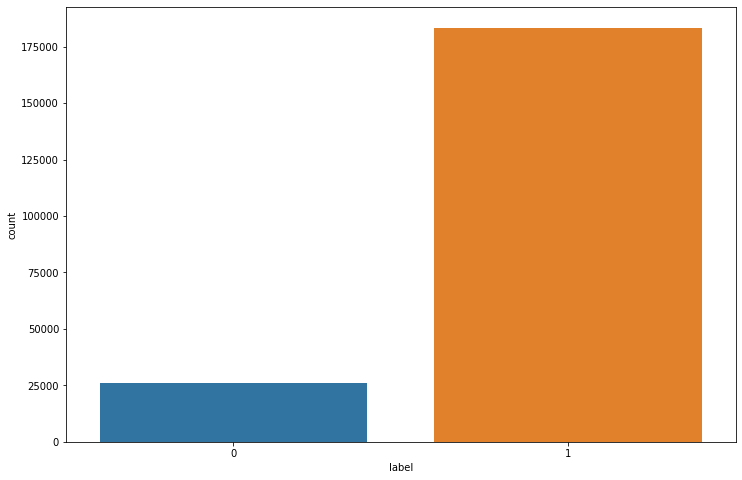

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x='label',data=df)

Most of the labels is of 1 than 0 means loan paid success is more than failure

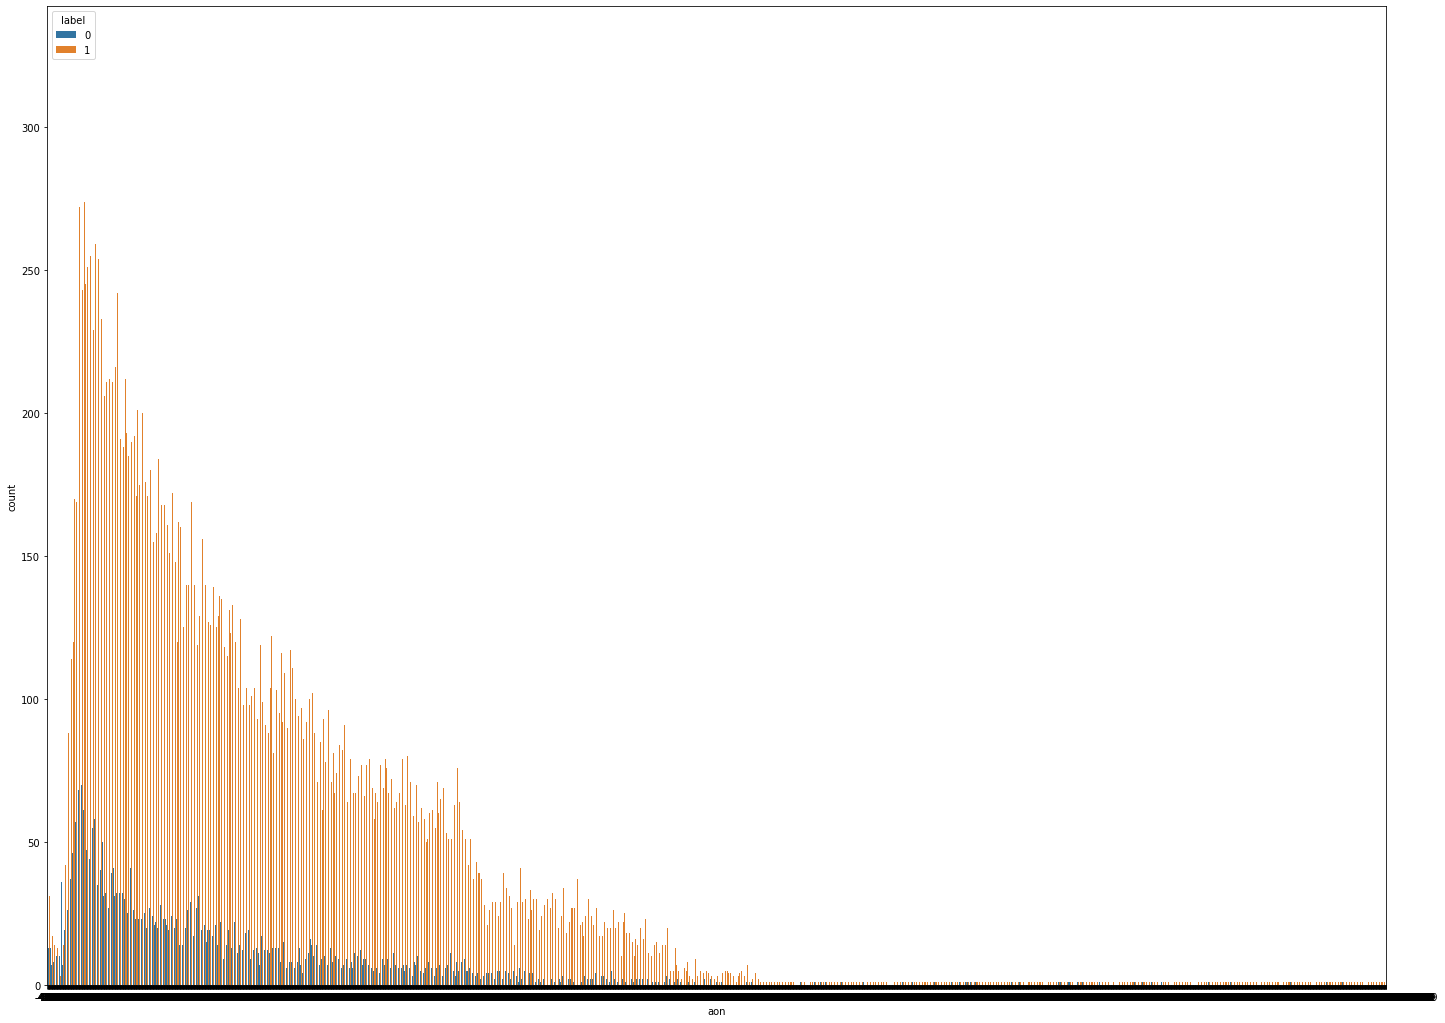

In [17]:
plt.figure(figsize=(24,18))
sns.countplot(x='aon',hue='label',data=df)

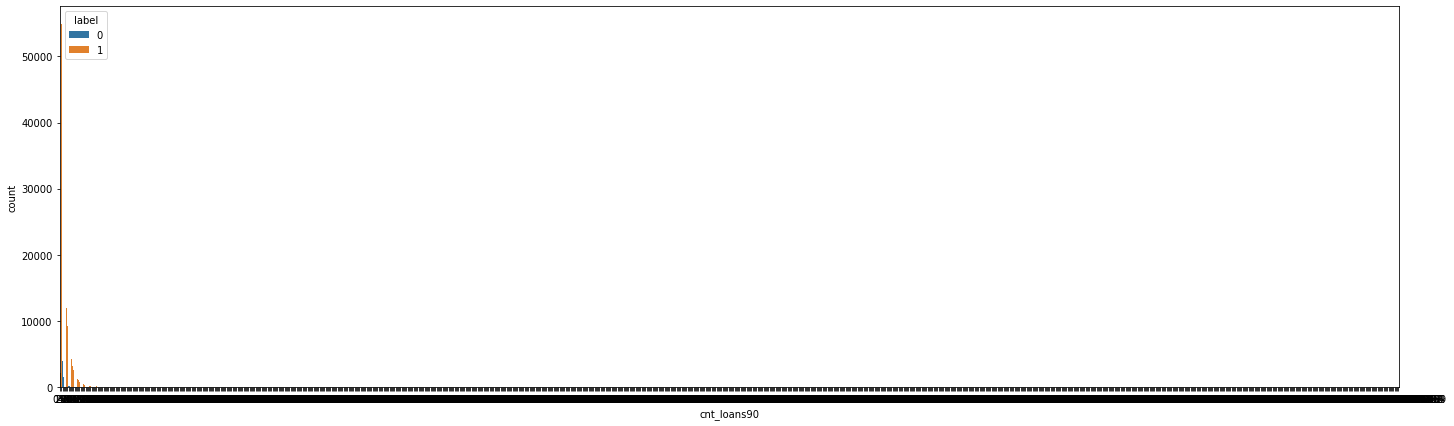

In [18]:
plt.figure(figsize=(24,7))
sns.countplot(x='cnt_loans90',hue='label',data=df)


Number of loans taken by user in last 90 days have more success rate of paying loan

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000544A36E348>,
      dtype=object)

<Figure size 1728x1296 with 0 Axes>

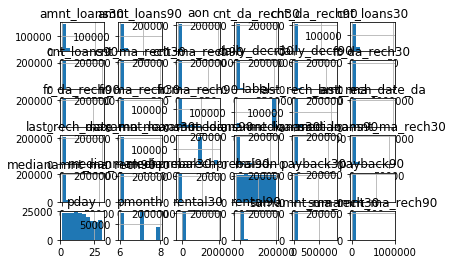

In [19]:
plt.figure(figsize=(24,18))
df.hist()

From above we can say most of the features are rightly skewed.

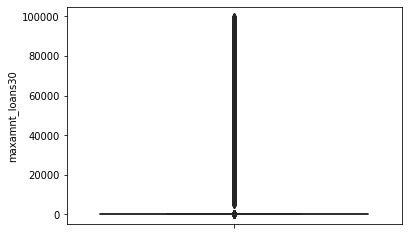

In [20]:
#checking outliers
sns.boxplot(df['maxamnt_loans30'],color='green',orient='v')
plt.show()
    

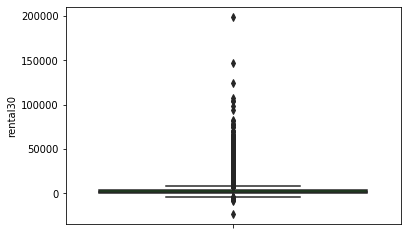

In [21]:
sns.boxplot(df['rental30'],color='green',orient='v')
plt.show()
    

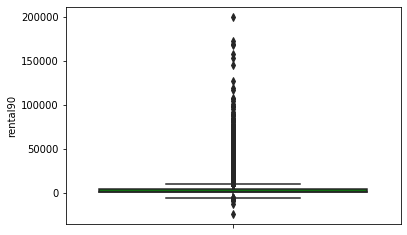

In [22]:
sns.boxplot(df['rental90'],color='green',orient='v')
plt.show()
    

there are many outliers present in it.

In [23]:
df.shape

(209593, 36)

In [24]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.64789583, 0.984213  , 0.10357685, ..., 2.39409346, 0.6637208 ,
        0.27336037],
       [0.37765836, 0.91502744, 0.09776412, ..., 0.41923266, 0.52127058,
        1.62209905],
       [0.37765836, 1.10692885, 0.10010243, ..., 0.41923266, 0.54522166,
        1.62209905],
       ...,
       [0.37765836, 0.7274342 , 0.09378769, ..., 0.04735622, 1.73021304,
        0.27336037],
       [0.37765836, 0.34017702, 0.08428915, ..., 0.59938541, 1.25621649,
        0.27336037],
       [0.37765836, 0.52386948, 0.08628398, ..., 0.41923266, 0.87676799,
        0.27336037]])

In [25]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([16, 16, 33, ..., 29, 27, 31], dtype=int64))


In [26]:
df_new=df[(z<3).all (axis=1)]
df_new

label  msisdn     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   40191   272.0   3055.050000   3065.150000    220.13    260.13   
1           1  142291   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   33594   535.0   1398.000000   1398.000000    900.13    900.13   
3           1  104157   241.0     21.228000     21.228000    159.42    159.42   
4           1    6910   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...     ...           ...           ...       ...       ...   
209588      1   42866   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  178248  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1   53995  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  111388  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  121263  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                     2.0                0.0              1539  ...   
1                    20.0                0.0              5787  ...   
2                     3.0                0.0              1539  ...   
3                    41.0                0.0               947  ...   
4                     4.0                0.0              2309  ...   
...                   ...                ...               ...  ...   
209588                1.0                0.0              4048  ...   
209589                4.0                0.0               773  ...   
209590                3.0                0.0              1539  ...   
209591                2.0               38.0               773  ...   
209592               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pday  \
0                     6                 0.0  29.000000  29.000000    20   
1                    12                 0.0   0.000000   0.000000    10   
2                     6                 0.0   0.000000   0.000000    19   
3                     6                 0.0   0.000000   0.000000     6   
4                     6                 0.0   2.333333   2.333333    22   
...                 ...                 ...        ...        ...   ...   
209588                6                 0.0   1.000000   1.000000    17   
209589                6                 0.0   1.000000   1.000000    12   
209590               12                 0.0   4.000000   3.833333    29   
209591               12                 0.0   0.000000  10.500000    25   
209592               12                 0.0   0.000000   0.000000     7   

        pmonth  
0            7  
1            8  
2            8  
3            6  
4            6  
...        ...  
209588       6  
209589       6  
209590       7  
209591       7  
209592       7  

[161465 rows x 36 columns]

In [27]:
df_new.shape

(161465, 36)

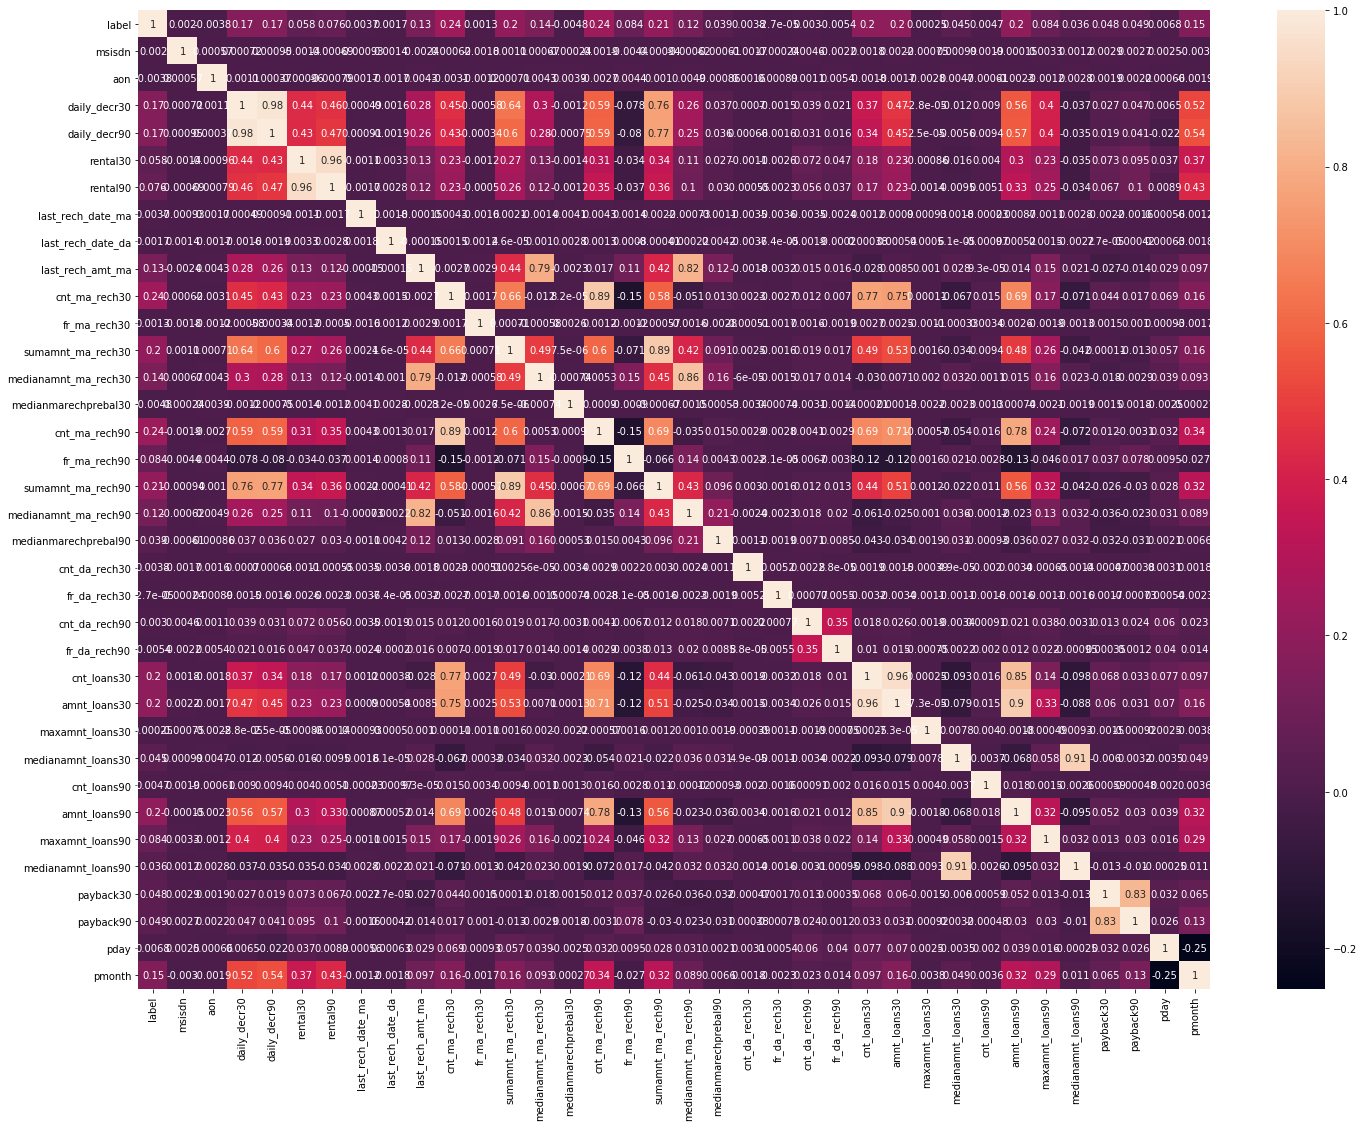

In [28]:
#checking correlation between target and input variables
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(),annot=True)

most of the features are towards the negatively correlated but data is important for us so we will not remove any feature

In [29]:
#checking skewness
df.skew()

label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

Many features containing values greater than 0.55 so lets remove skewness

In [30]:
#Removing skewness
from sklearn.preprocessing import power_transform
for column in df.columns:
    if df.skew().loc[column]>0.55:
        df[column]=power_transform(df[column].values.reshape(-1,1),method='yeo-johnson')

In [31]:
#again checking skewness
df.skew()

label                    -2.270254
msisdn                    0.000719
aon                       1.654517
daily_decr30             -6.582717
daily_decr90             -7.080193
rental30                 -1.022844
rental90                 -0.962717
last_rech_date_ma        -5.362529
last_rech_date_da      -106.606655
last_rech_amt_ma         -0.061262
cnt_ma_rech30            -0.000145
fr_ma_rech30              0.165015
sumamnt_ma_rech30        -0.291322
medianamnt_ma_rech30     -0.189628
medianmarechprebal30     -0.119058
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142952
sumamnt_ma_rech90        -0.192158
medianamnt_ma_rech90     -0.044604
medianmarechprebal90      7.506286
cnt_da_rech30             6.925820
fr_da_rech30             11.390665
cnt_da_rech90             6.006577
fr_da_rech90             15.469700
cnt_loans30               0.036243
amnt_loans30              0.001948
maxamnt_loans30          -1.680107
medianamnt_loans30        3.447735
cnt_loans90         

## Model Building

In [32]:
x=df_new.drop(columns='label').values
y=df_new['label']

In [33]:
print(x.shape,'\t\t',y.shape)

(161465, 35) 		 (161465,)


In [34]:
#splitting data into Train and Test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

In [35]:
#scaling the data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [36]:
 #importing all model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score


## Finding the best parameters

#To find best parameters in logistic regression
parameters={'C':[1,10],'random_state':range(38,48)}
lg=LogisticRegression()
clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)
output:C=1,random_state=38

In [37]:
#checking score with different models
model=[LogisticRegression(C=1,random_state=38),GaussianNB(),DecisionTreeClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("***********************************************************************")
    print('\n')

Accuracy score of LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=38, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is
0.8657913479701483
[[  490  3990]
 [  344 27469]]
              precision    recall  f1-score   support

           0       0.59      0.11      0.18      4480
           1       0.87      0.99      0.93     27813

    accuracy                           0.87     32293
   macro avg       0.73      0.55      0.56     32293
weighted avg       0.83      0.87      0.82     32293

***********************************************************************


Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is
0.6492738364351407
[[ 3770   710]
 [10616 17197]]
              precision    recall  f1-score   support

           0       0.26      0.84  

Among all models logistic regression is giving highest score so lets cross validate it

In [38]:
from sklearn.model_selection import cross_val_score
lgscores=cross_val_score(LogisticRegression(C=1,random_state=38),x,y,cv=10)
print(lgscores)
print(lgscores.mean())


[0.86350406 0.86257509 0.86307054 0.86282282 0.86474268 0.86262851
 0.8633098  0.86324786 0.86454849 0.86430076]
0.8634750606021349


Cross validation score is also same as model score so we can say logistic regression model is a good fit

## Hyper Parameter Tunning


In [39]:
from sklearn.model_selection import GridSearchCV
logreg=LogisticRegression()
grid={'C':np.logspace(-3,3,7),"penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)
logreg_cv.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [40]:
#Logistic Regression with best parameters
lr=LogisticRegression(C=0.01,penalty='l2',random_state=38)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy score',accuracy_score(y_test,predlr))
print('confusion_matrix',confusion_matrix(y_test,predlr))
print('classification_report',classification_report(y_test,predlr))



Accuracy score 0.8664726101631932
confusion_matrix [[  501  3979]
 [  333 27480]]
classification_report               precision    recall  f1-score   support

           0       0.60      0.11      0.19      4480
           1       0.87      0.99      0.93     27813

    accuracy                           0.87     32293
   macro avg       0.74      0.55      0.56     32293
weighted avg       0.84      0.87      0.82     32293



Here we are getting slight more score than model without tunning but lets apply some boosting techniques.

In [41]:
#Boosting Technique
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print('accuracy score:',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy score: 0.8853002198618896
[[ 1223  3257]
 [  447 27366]]
              precision    recall  f1-score   support

           0       0.73      0.27      0.40      4480
           1       0.89      0.98      0.94     27813

    accuracy                           0.89     32293
   macro avg       0.81      0.63      0.67     32293
weighted avg       0.87      0.89      0.86     32293



In [42]:
from sklearn.ensemble import AdaBoostClassifier   # for sequential or boosting ensemble technique
#AdaBoostClassifier(base_estimator=desion tree classifier(),n_estimator=50,learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))


0.8696931223484966
[[  575  3905]
 [  303 27510]]
              precision    recall  f1-score   support

           0       0.65      0.13      0.21      4480
           1       0.88      0.99      0.93     27813

    accuracy                           0.87     32293
   macro avg       0.77      0.56      0.57     32293
weighted avg       0.85      0.87      0.83     32293



In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))


0.8790140278078841
[[  969  3511]
 [  396 27417]]
              precision    recall  f1-score   support

           0       0.71      0.22      0.33      4480
           1       0.89      0.99      0.93     27813

    accuracy                           0.88     32293
   macro avg       0.80      0.60      0.63     32293
weighted avg       0.86      0.88      0.85     32293



Among all boosting techniques random forest is giving good score ,lets save the model after cross validating it

In [44]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rfc,x,y,cv=10)
print(rfscores)
print(rfscores.mean())


[0.91868459 0.91719824 0.91434941 0.91701245 0.91719824 0.91595442
 0.91936083 0.91836987 0.91620216 0.91855568]
0.9172885888583513


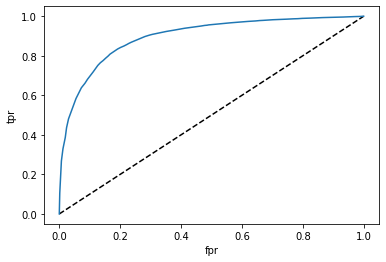

0.5499287693383361


In [45]:
#AUC ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
y_pred=lr.predict(x_test)
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

In [46]:
#Saving a model
from sklearn.externals import joblib
joblib.dump(rfc,'micro_credit.pkl')

['micro_credit.pkl']